In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Exploratory Data Analysis

In [2]:
cov19 = pd.read_csv("owid-covid-data.csv")
cov19.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [3]:
cov19.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
107054,ZWE,Africa,Zimbabwe,2021-07-30,107490.0,1834.0,1686.286,3490.0,69.0,75.571,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
107055,ZWE,Africa,Zimbabwe,2021-07-31,108860.0,1370.0,1654.714,3532.0,42.0,68.857,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
107056,ZWE,Africa,Zimbabwe,2021-08-01,109546.0,686.0,1664.571,3583.0,51.0,69.857,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
107057,ZWE,Africa,Zimbabwe,2021-08-02,110855.0,1309.0,1558.714,3635.0,52.0,66.000,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
107058,ZWE,Africa,Zimbabwe,2021-08-03,112435.0,1580.0,1532.000,3676.0,41.0,56.571,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [4]:
# Column names
print(cov19.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [5]:
cov19[cov19['location'] == 'India'].date.count()

552

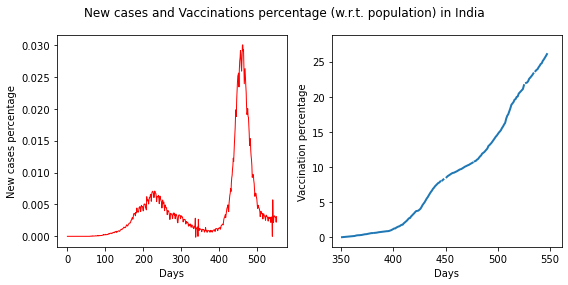

In [10]:
india = cov19[cov19['location'] == 'India']
india_new_cases = india.new_cases
india_population = india.population.mean()
india_vac1d = india.people_vaccinated
date_count = india.date.count()
india_days = range(date_count)
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (8,4))
ax1.plot(india_days, (india_new_cases/india_population)*100, "red", linewidth = 1)
ax1.set_xlabel('Days')
ax1.set_ylabel('New cases percentage')
#
ax2.plot(india_days, (india_vac1d/india_population)*100, linewidth = 2)
ax2.set_xlabel('Days')
ax2.set_ylabel('Vaccination percentage')
#
fig.suptitle('New cases and Vaccinations percentage (w.r.t. population) in India')
fig.tight_layout()
plt.show()

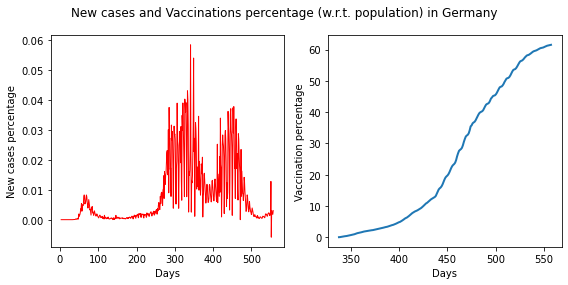

In [11]:
germany = cov19[cov19['location'] == 'Germany']
germany_new_cases = germany.new_cases
germany_population = germany.population.mean()
germany_vac1d = germany.people_vaccinated
date_count = germany.date.count()
germany_days = range(date_count)
#
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (8,4))
ax1.plot(germany_days, (germany_new_cases/germany_population)*100, "red", linewidth = 1)
ax1.set_xlabel('Days')
ax1.set_ylabel('New cases percentage')
#
ax2.plot(germany_days, (germany_vac1d/germany_population)*100, linewidth = 2)
ax2.set_xlabel('Days')
ax2.set_ylabel('Vaccination percentage')
# 
fig.suptitle('New cases and Vaccinations percentage (w.r.t. population) in Germany')
fig.tight_layout()
plt.show()

## India Vs Germany

New cases and vaccinations in comparison to the population is plotted for two countries. Germany has reached the 60% vaccination (at least 1 dose) in about 200 days, where India is around 25%. This difference is mainly due to absolute population of two countries and availability of vaccines.